In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from matplotlib import pyplot as plt

In [72]:
#read the database file
df = pd.read_csv('master.csv')

In [73]:
#basic info types
df.dtypes
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
country            27820 non-null object
year               27820 non-null int64
sex                27820 non-null object
age                27820 non-null object
suicides_no        27820 non-null int64
population         27820 non-null int64
suicidesper100k    27820 non-null float64
HDI_for_year       8364 non-null float64
gdp_for_year       27820 non-null object
gdp_per_capita     27820 non-null int64
generation         27820 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


,country,year,sex,age,suicides_no,population,suicidesper100k,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [75]:
us = df[df.country == "United States"]
gy = df[df.country == "Guyana"]

In [76]:
#isolating data for the us and guyana since guyana has been observed to have the highest rate
usdeaths = df[df.suicidesper100k == "United States"]
gydeaths = df[df.suicidesper100k == "Guyana"]

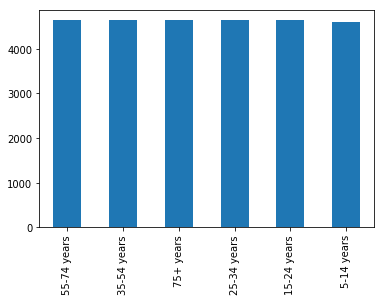

In [77]:
#worldwide age suicide count
df['age'].value_counts().plot(kind = 'bar')

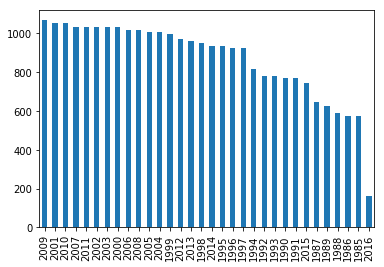

In [78]:
#year based suicide count
df['year'].value_counts().plot(kind = 'bar')

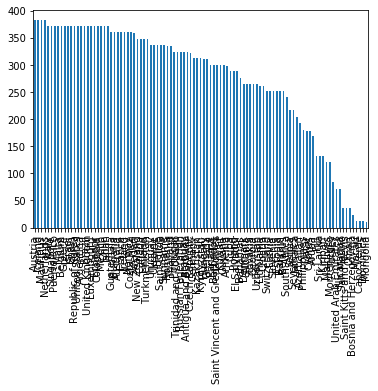

In [59]:
#country based suicide count
df['country'].value_counts().plot(kind = 'bar')

In [73]:
#TESTING SCATTERPLOT
#col_list=[]
#for(name, series)in df.iteritems():
  #  if series.dtype!='object':
 #       col_list.append(name)
#fig, ax=plt.subplots(6,6,figsize=(18,8))
# get a bigger figure
#df_for_hist=df[col_list]
#df_for_hist.hist(bins=20, alpha=0.5, ax=ax)

In [29]:
#find missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
HDI for year,19456,0.699353
generation,0,0.000000
gdp_per_capita ($),0,0.000000
gdp_for_year ($),0,0.000000
country-year,0,0.000000
suicides/100k,0,0.000000
population,0,0.000000
suicides_no,0,0.000000
age,0,0.000000
sex,0,0.000000


In [95]:
#lots of missing values for HDI so we use kNN to impute
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
impute_copy = df[['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicidesper100k', 'HDI_for_year','gdp_for_year', 'gdp_per_capita','generation']].copy()
imputer.fit_transform('HDI_for_year')

NameError: name 'imputer' is not defined

In [98]:
#we do not need HDI, so we remove the column
df = df.drop(columns='HDI_for_year')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
country            27820 non-null object
year               27820 non-null int64
sex                27820 non-null object
age                27820 non-null object
suicides_no        27820 non-null int64
population         27820 non-null int64
suicidesper100k    27820 non-null float64
gdp_for_year       27820 non-null object
gdp_per_capita     27820 non-null int64
generation         27820 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [30]:
#remove outliers
def removeOutlier(x):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
# remove the outliers
    df[x] = np.where(df[x] > high, df[x].mean(),df[x])
    df[x] = np.where(df[x] < low, df[x].mean(),df[x])

In [60]:
sdf= pd.read_csv('master.csv')

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [120]:
#new dataset with only US numbers
index = df.index
index = "United States"
print(index)
df2 = df[(df['country'] == 'United States')]
print (df2)

United States
             country  year     sex          age  suicides_no  population  \
26848  United States  1985    male    75+ years         2177     4064000   
26849  United States  1985    male  55-74 years         5302    17971000   
26850  United States  1985    male  25-34 years         5134    20986000   
26851  United States  1985    male  35-54 years         6053    26589000   
26852  United States  1985    male  15-24 years         4267    19962000   
26853  United States  1985  female  35-54 years         2105    27763000   
26854  United States  1985  female  55-74 years         1568    21366000   
26855  United States  1985  female    75+ years          466     7469000   
26856  United States  1985  female  25-34 years         1242    21041000   
26857  United States  1985  female  15-24 years          854    19589000   
26858  United States  1985    male   5-14 years          205    17370000   
26859  United States  1985  female   5-14 years           73    16553000  

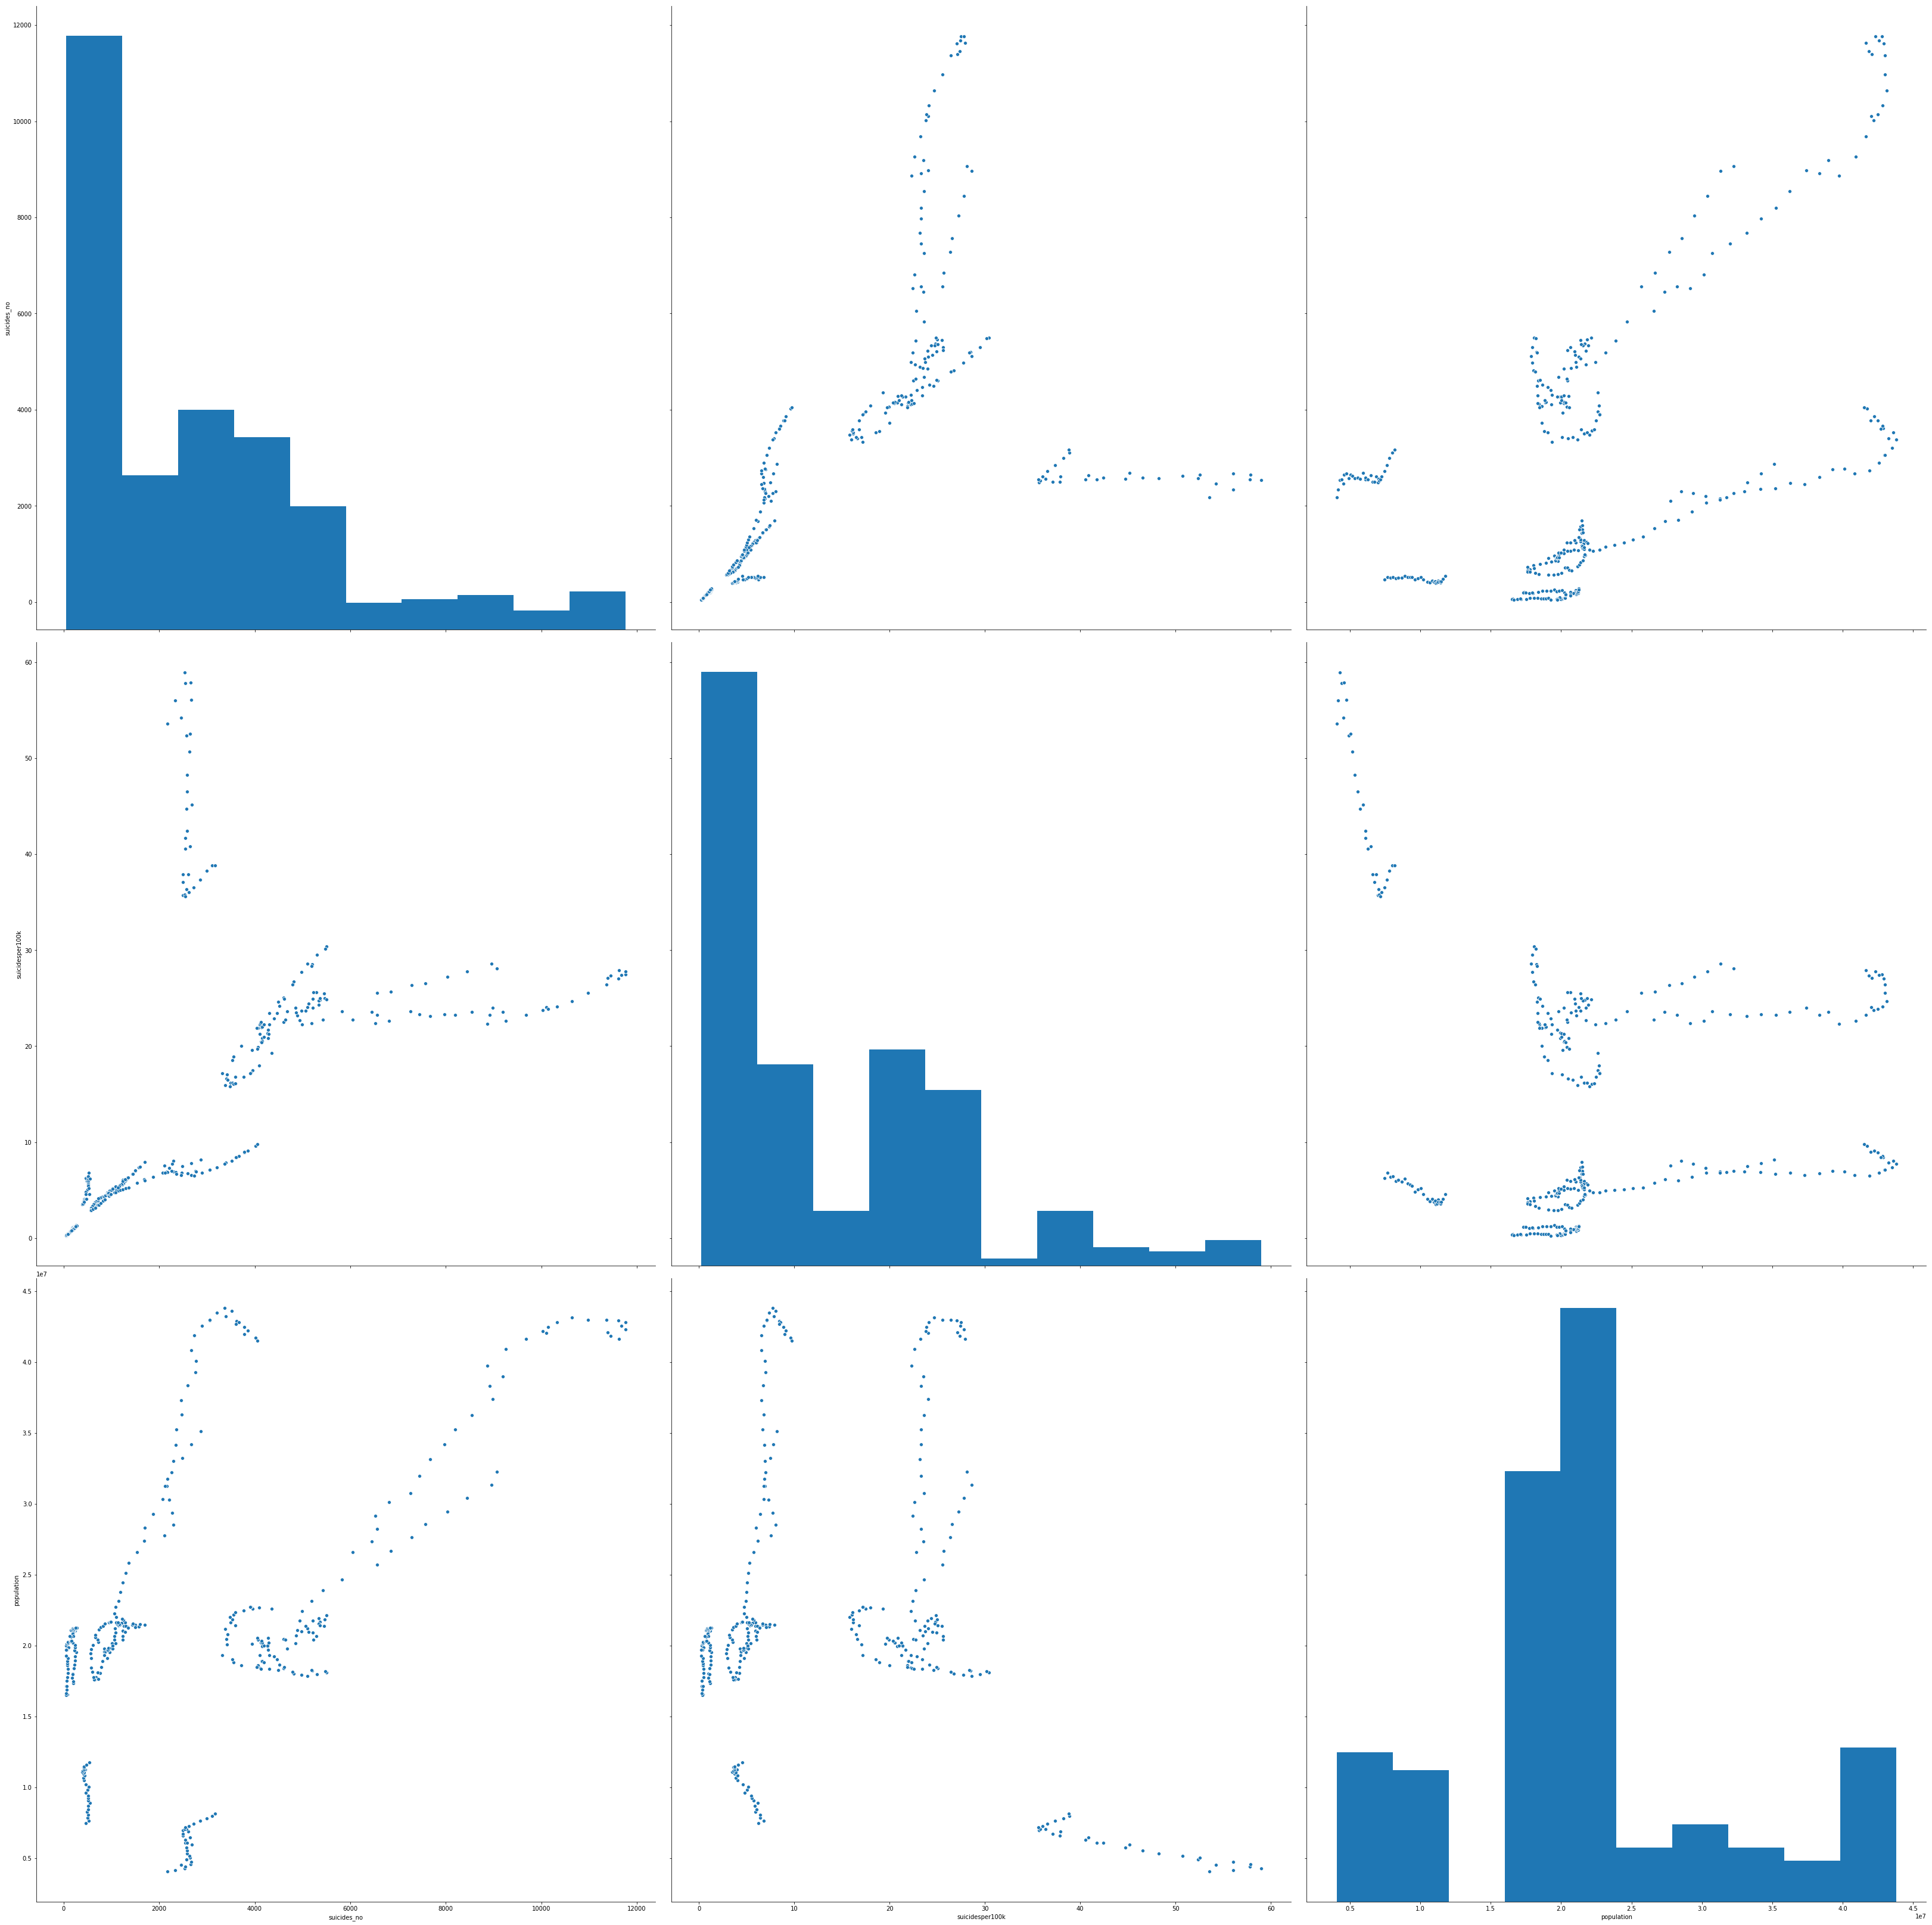

In [130]:
#2
#make scatterplot
#plt.scatter(sdf,sdf)
cols = ['age', 'suicides_no', 'suicidesper100k', 'population']
sns.pairplot(df2[cols], height = 15);
#sdfScatterPlot = sdf._get_numeric_data()
#scatterPlots = sns.pairplot(sdf, hue = 'origin', diag_kind = 'hist', markers = ['x', '.', 'o'])

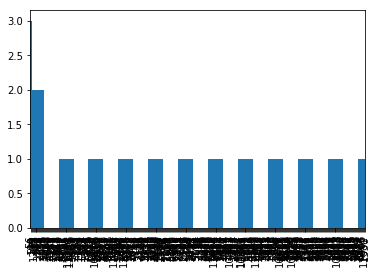

In [122]:
#show bar diagram of the suicide numbers in the US per year
df2['suicides_no'].value_counts().plot(kind = 'bar')

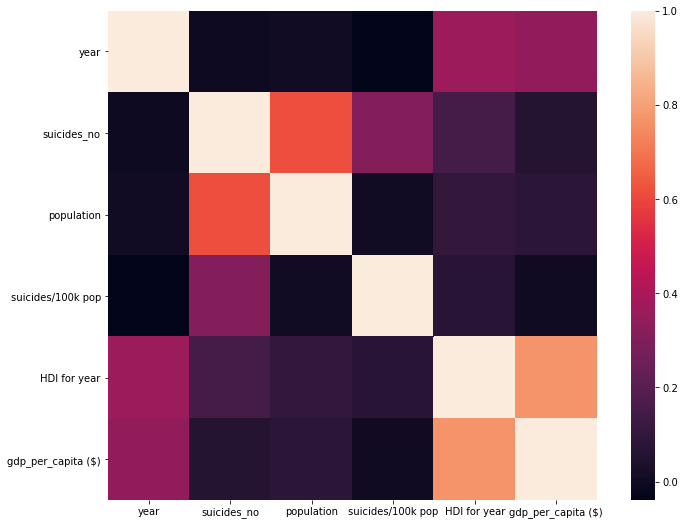

In [75]:
#heatmap
corrmat =df.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=1, square=True);

In [203]:
# here we evaluate the statistics of the suicide count
df['suicides_no'].describe()

count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64

In [202]:
#here we evaluate the statistics of the suicide rate per 100k
df['suicidesper100k'].describe()

count    27820.000000
mean        12.816097
std         18.961511
min          0.000000
25%          0.920000
50%          5.990000
75%         16.620000
max        224.970000
Name: suicidesper100k, dtype: float64

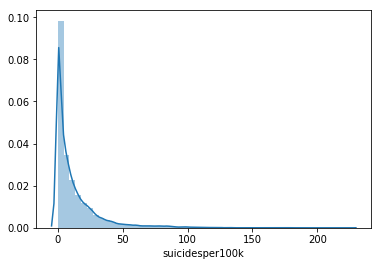

In [206]:
#distribution of suicide rate
sns.distplot(df['suicidesper100k']);

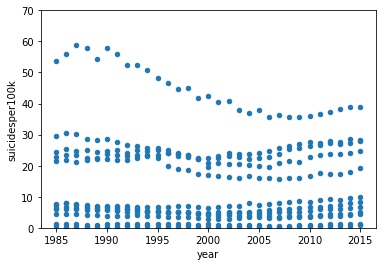

In [146]:
# relation b/w suicide rate and year
var = 'year'
data = pd.concat([df2['suicidesper100k'], df2[var]], axis=1)
data.plot.scatter(x=var, y='suicidesper100k', ylim=(0,70));

In [78]:
#print skewness
print("Skewness: %f" % df['suicides_no'].skew())

Skewness: 10.352910


In [226]:
#features by column
#columns = df.columns[['age', 'suicides_no', 'suicidedsper100k', 'gdp_for_year','gdp_per_capita']].values
print(columns)
#columnlist = df2.columns[['age', 'suicides_no', 'suicidedsper100k', 'gdp_for_year','gdp_per_capita']].values
meanval = df2.mean(axis=1)
print(meanval)
#df2.mean()
#standard deviation

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100k', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')
[0.45416596 0.24910547 0.206168   0.19177032 0.17992844 0.06236156
 0.06031692 0.05094565 0.04804907 0.03492929 0.00783779 0.00153348
 0.49161981 0.27335435 0.23152439 0.21525246 0.1992361  0.08311751
 0.08175442 0.07229795 0.06471574 0.05168115 0.02424888 0.01734821
 0.53333333 0.28789118 0.24222752 0.22944851 0.21223945 0.09697279
 0.0943318  0.08564207 0.08172318 0.06783666 0.04083035 0.0337593
 0.54011757 0.29067132 0.26076844 0.23861816 0.23452888 0.10997615
 0.10742034 0.10264951 0.0964304  0.08399216 0.0564747  0.05093713
 0.52637019 0.3058897  0.27172715 0.25707389 0.25392174 0.12332027
 0.12127563 0.11505651 0.11215994 0.10048844 0.07314136 0.06726302
 0.57396206 0.3247714  0.29205714 0.28234509 0.26845857 0.14126484
 0.13947578 0.13266031 0.1289118  0.11451411 0.09040438 0.08452604
 0.57529392 0.33419663 0.310938

In [234]:
#read the organized file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df3 = pd.read_csv('abt.csv', index_col=0)

In [235]:
#checking the new temp dataframe
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 26848 to 27219
Data columns (total 10 columns):
country            372 non-null object
year               372 non-null int64
sex                372 non-null object
age                372 non-null object
suicides_no        372 non-null int64
population         372 non-null int64
suicidesper100k    372 non-null float64
gdp_for_year       372 non-null object
gdp_per_capita     372 non-null int64
generation         372 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 32.0+ KB


,country,year,sex,age,suicides_no,population,suicidesper100k,gdp_for_year,gdp_per_capita,generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,"4,346,734,000,000",19693,Generation X


In [239]:
#print columns
print(columns)
#select columns we need to calculate data and assign to a new dataframe

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100k', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')


In [241]:
df4 = df3.describe()

In [64]:
df4.info()

NameError: name 'df4' is not defined

In [251]:
df4 = df4.transpose()

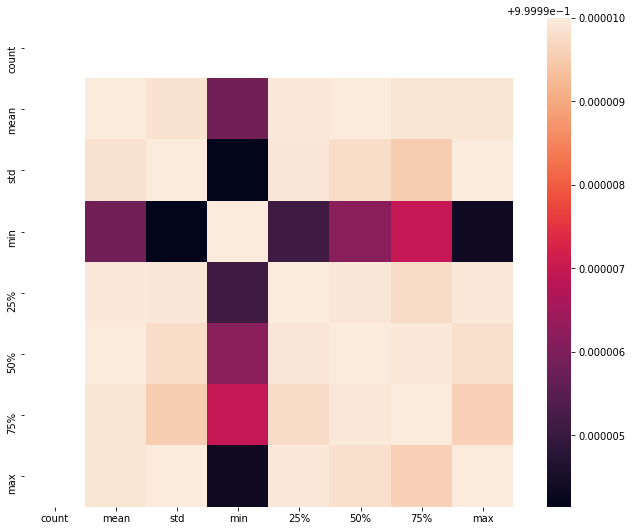

In [248]:
#heatmap for the processed data

In [247]:
#final processed dataset
df4.to_csv('features.csv')
#features

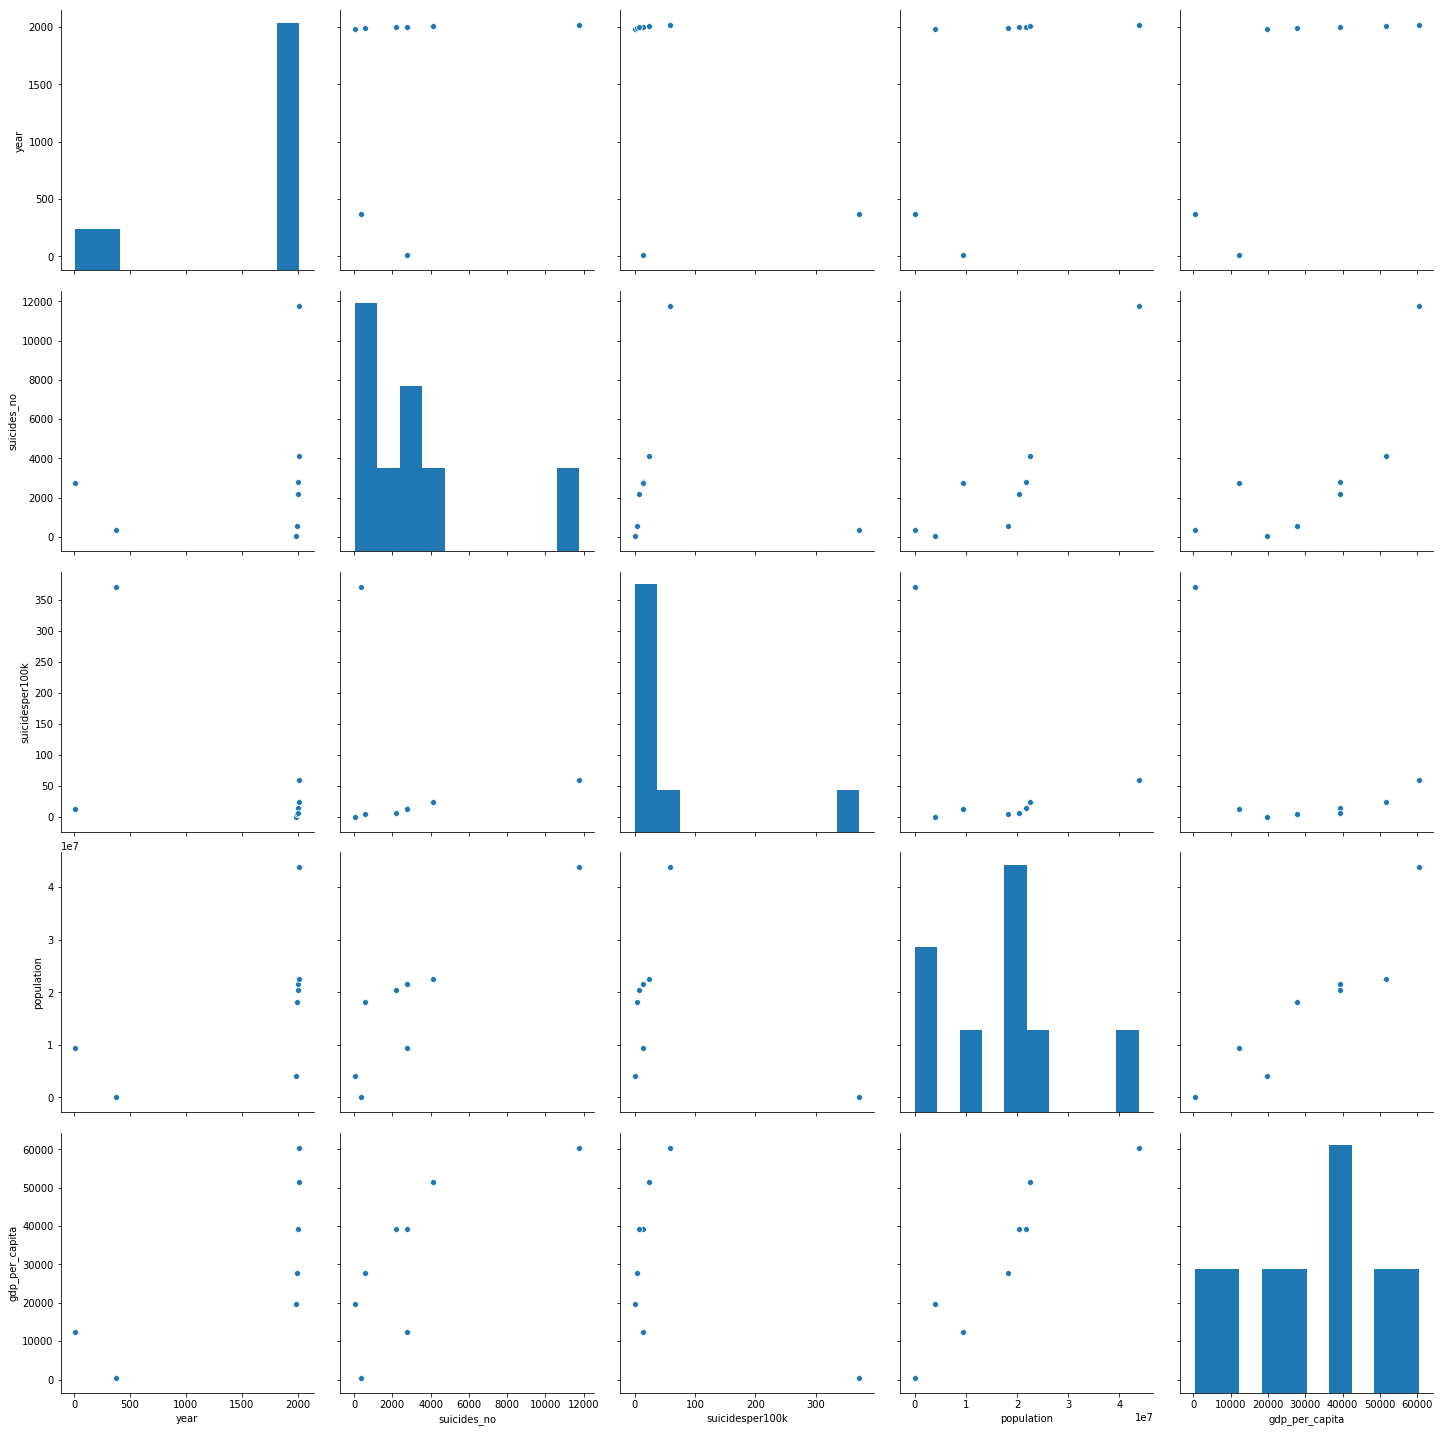

In [265]:
#scatterplot to see correlations
cols = ['year', 'suicides_no', 'suicidesper100k', 'population', 'gdp_per_capita']
sns.pairplot(df4[cols], height = 4);

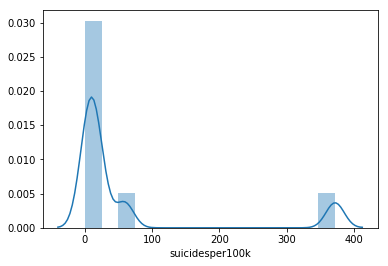

In [260]:
#check the frequency
sns.distplot(df4['suicidesper100k']);

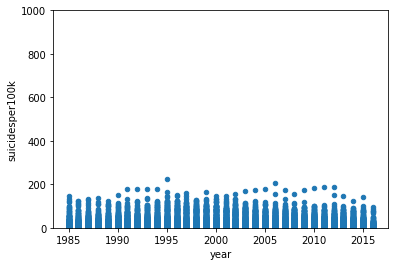

In [263]:
#check the distribution
var = 'year'
data = pd.concat([df['suicidesper100k'], df[var]], axis=1)
data.plot.scatter(x=var, y='suicidesper100k', ylim=(0,1000));

In [273]:
#normalize data
import pandas as pd
from sklearn import preprocessing

x = df4.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df5 = pd.DataFrame(x_scaled)

In [270]:
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
0    8 non-null float64
1    8 non-null float64
2    8 non-null float64
3    8 non-null float64
4    8 non-null float64
dtypes: float64(5)
memory usage: 400.0 bytes


,0,1,2,3,4
0,0.180975,0.027481,0.000000,1.000000,0.000000
1,0.992523,0.232961,0.494243,0.036477,0.648132
2,0.000000,0.230666,0.215690,0.034890,0.199319
3,0.985045,0.000000,0.092767,0.000000,0.321936
4,0.988535,0.043420,0.415139,0.009987,0.456353


In [ ]:
#linear regression preparation

In [349]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [328]:
#Create the X & Y Variables
X = df['year'].values.reshape(-1,1)
y = df['suicidesper100k'].values.reshape(-1,1)

In [329]:
#Create the training a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [330]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [331]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[170.95737356]
[[-0.07897822]]


In [332]:
y_pred = regressor.predict(X_test)

In [333]:
df6 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df6

,Actual,Predicted
0,10.31,13.000938
1,42.77,12.053200
2,0.88,12.290134
3,43.67,12.764004
4,8.87,13.237873
5,4.00,12.764004
6,1.35,13.000938
7,44.31,11.895243
8,2.33,12.211156
9,0.40,12.448091


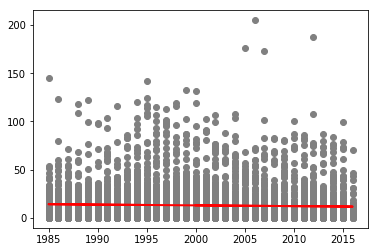

In [342]:
#Plot the residuals
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [79]:
#print metrics
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
X = df[['mean', 'min', '25%', 'std', '50%', 'max', '75%']].values
y = df['suicidesper100k'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
#prediction:
y_pred=logreg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Misclassification error:", 1-metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred,pos_label='year'))
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='suicideper100k'))
print('F1 score:',f1_score(y_test, y_pred, average='micro'))

KeyError: "None of [Index(['mean', 'min', '25%', 'std', '50%', 'max', '75%'], dtype='object')] are in the [columns]"

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'y_test' is not defined

In [59]:
#print confusion matrix
confusion_matrix(y_test, y_pred)
#class. error


NameError: name 'confusion_matrix' is not defined